## Gravitational Wave Signal from Merging Black Holes

This time series represents the gravitational wave signal amplitude generated from a pair of black holes spiraling towards each other and eventually merging. As the black holes spiral inwards, both the amplitude and the frequency of the gravitational wave signal increase over time. The following describes the mathematical formulation used to simulate this signal:

### Mathematical Description

1. **Time Variable**:
   - $( T = 100 $) : Total time.
   - $( \Delta t = 0.1 $) : Time step.
   - $( t = \{0, 0.1, 0.2, \ldots, 99.9\} $) : Discrete time points.

2. **Amplitude of the Gravitational Wave Signal**:
   - $( A_0 = 0.01 $) : Initial amplitude.
   - $( \alpha = 0.0001 $) : Amplitude growth rate.
   - $( A(t) = A_0 + \alpha \cdot t $) : Amplitude increases linearly over time.

3. **Frequency of the Gravitational Wave Signal**:
   - $( f_0 = 0.05 $) : Initial frequency.
   - $( \beta = 0.0005 $) : Frequency increase rate.
   - $( f(t) = f_0 + \beta \cdot t $) : Frequency increases linearly over time.

4. **Gravitational Wave Signal**:
   - The signal is modeled as a sinusoidal wave with time-varying amplitude and frequency.
   - $( S(t) = A(t) \cdot \sin(2 \pi f(t) t) $).
   - Noise $( N(t) $) is added to simulate real-world observations.
   - $( N(t) $) is normally distributed with a standard deviation of 0.015.

5. **Noisy Signal**:
   - $( S_{\text{noisy}}(t) = S(t) + N(t) $).

### Implementation

The following Python code generates the synthetic gravitational wave signal, adds noise, and saves the resulting data to an Excel file.


In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd

# Define parameters for the synthetic gravitational wave signal
initial_amplitude = 0.01  # Initial amplitude of the wave
amplitude_growth_rate = 0.0001  # Rate at which amplitude increases
initial_frequency = 0.05  # Initial frequency of the wave
frequency_increase_rate = 0.0005  # Rate at which frequency increases
T = 100  # Total time
dt = 0.1  # Time step

# Generate time points
t = np.arange(0, T, dt)

# Generate the gravitational wave signal with increasing amplitude and frequency
amplitude = initial_amplitude + amplitude_growth_rate * t
frequency = initial_frequency + frequency_increase_rate * t
signal = amplitude * np.sin(2 * np.pi * frequency * t)

# Add some noise to the signal
noise = np.random.normal(scale=0.015, size=len(t))
noisy_signal = signal + noise

# Create a DataFrame
df = pd.DataFrame({'Time': t, 'Signal': noisy_signal})

df.to_excel('gravitational_wave.xlsx','data')

### Data importation and visualization
Import the excel file and visulaize the data with different techniques

In [2]:
# Exercise 1 
# Upload the excel file damped_oscillator.xlsx using pandas to a dataframe object
series = pd.read_excel('gravitational_wave.xlsx',
                    sheet_name='data', header=0, index_col=0,
                     dtype=float) 
series

,Time,Signal
0,0.0,0.017560
1,0.1,0.001587
2,0.2,0.015425
3,0.3,-0.004626
4,0.4,0.012211
...,...,...
995,99.5,-0.013221
996,99.6,0.004211
997,99.7,-0.001485
998,99.8,0.013858


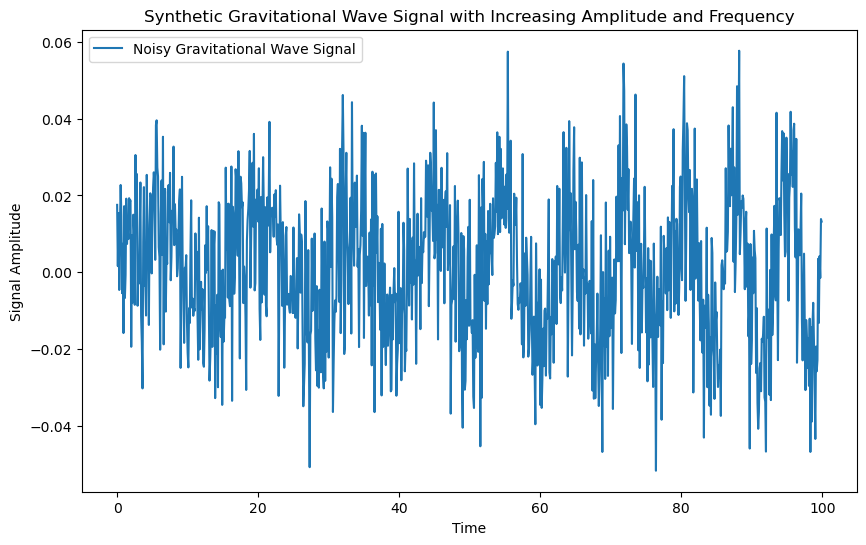

In [3]:
# Exercise 2
# Plot time (x-axis) versus position (y-ais) using matplotlib pyplot. Add appropriate labels
import matplotlib.pyplot as plt

# Plot the synthetic gravitational wave data (Signal) vs time
plt.figure(figsize=(10, 6))
plt.plot(series['Time'], series['Signal'], label='Noisy Gravitational Wave Signal')
plt.xlabel('Time')
plt.ylabel('Signal Amplitude')
plt.title('Synthetic Gravitational Wave Signal with Increasing Amplitude and Frequency')
plt.legend()
plt.show()

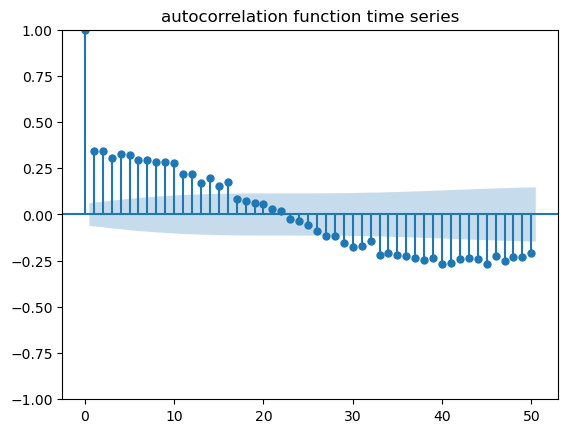

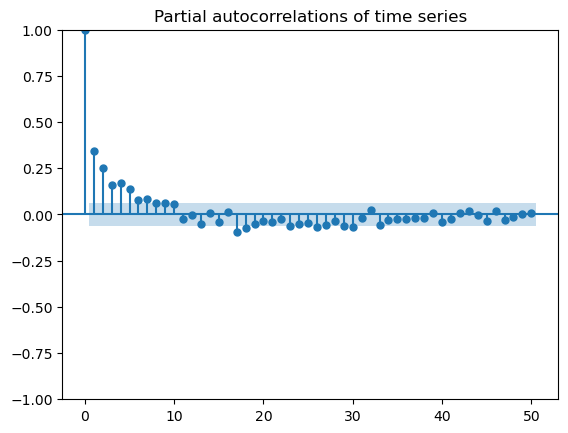

In [4]:
# Exercise 3
# Plot the autocorrelation function time series of the position data (50 lags for example)
# Plot the partial autocorrelation function time series of the position data (50 lags for example)
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(series['Signal'], title='autocorrelation function time series', lags=50)
plot_pacf(series['Signal'], title='Partial autocorrelations of time series', lags=50)
plt.show()

### Modeling and forecasting
After basic drawing and visulazation of the data try to analyze the position data and do some forcasting using the SARIMAX model

In [5]:
# Exercise 4
# import itertools, and use it to generate different combinations of parameters for the SARIMAX model
import itertools

# The p and q parameters are given and equal to 2; as itertools 
p = q = range(2, 3)

# Define the d parameter to be an integer between 0 and 1
d = range(0, 2)

# Generate all different combinations of p, d and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, d and q triplets (i.e., P, D, Q)
# Use a value of 10 for the seasonality S
seasonal_pdq = [(x[0], x[1], x[2], 10) for x in list(itertools.product(p, d, q))]

In [6]:
# Exercise 5
# Define a SARIMAX model and identify the optimal parameters according to the AIC criterion
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings
import traceback

warnings.filterwarnings("ignore")  # specify to ignore warning messages

# Identification of best model from different combinations of pdq and seasonal_pdq
best_score, best_param, best_paramSeasonal = float("inf"), None, None
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = SARIMAX(series['Signal'], order=param, seasonal_order=param_seasonal, enforce_invertibility=False)
            results = mod.fit(disp=False)
            if results.aic < best_score:
                best_score, best_param, best_paramSeasonal = results.aic, param, param_seasonal
            print('ARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
        except Exception as e:
            print(f'Exception for ARIMA{param}x{param_seasonal}: {e}')
            traceback.print_exc()
            continue  # if fit fails, just continue to the next parameters combination


ARIMA(2, 0, 2)x(2, 0, 2, 10) - AIC:-5376.328725185498
ARIMA(2, 0, 2)x(2, 1, 2, 10) - AIC:-5254.734031554179
ARIMA(2, 1, 2)x(2, 0, 2, 10) - AIC:-5327.846165843035
ARIMA(2, 1, 2)x(2, 1, 2, 10) - AIC:-5228.382336975254


In [7]:
# Exercise 6
# Print the best set of parameters according to the AIC
print('The best model is ARIMA{}x{} - AIC:{}'.format(best_param, best_paramSeasonal, best_score))

The best model is ARIMA(2, 0, 2)x(2, 0, 2, 10) - AIC:-5376.328725185498


In [8]:
# Exercise 7
# Fit the model once again using the optimal parameters, and print a summary of the results
mod = SARIMAX(series['Signal'], order=best_param, seasonal_order=best_paramSeasonal, enforce_invertibility=False)
results=mod.fit()
print(results.summary())

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.68797D+00    |proj g|=  1.31775D+00


 This problem is unconstrained.



At iterate    5    f= -2.68934D+00    |proj g|=  2.88848D+00

At iterate   10    f= -2.69188D+00    |proj g|=  2.12981D-02

At iterate   15    f= -2.69214D+00    |proj g|=  4.79624D-02

At iterate   20    f= -2.69231D+00    |proj g|=  1.12738D-02

At iterate   25    f= -2.69303D+00    |proj g|=  2.05227D-01

At iterate   30    f= -2.69509D+00    |proj g|=  9.08718D-02

At iterate   35    f= -2.69580D+00    |proj g|=  1.20201D-02

At iterate   40    f= -2.69597D+00    |proj g|=  1.64437D-02

At iterate   45    f= -2.69640D+00    |proj g|=  8.94609D-02

At iterate   50    f= -2.69716D+00    |proj g|=  1.71851D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

In [9]:
# Exercise 8
# Forecast future values for 20 steps
n_forecast = 20  # Number of steps to forecast
forecast = results.get_forecast(steps=n_forecast)
forecast_index = np.arange(T, T + n_forecast * dt, dt)

# Extract forecasted values and confidence intervals
forecast_values = forecast.predicted_mean
conf_int = forecast.conf_int()


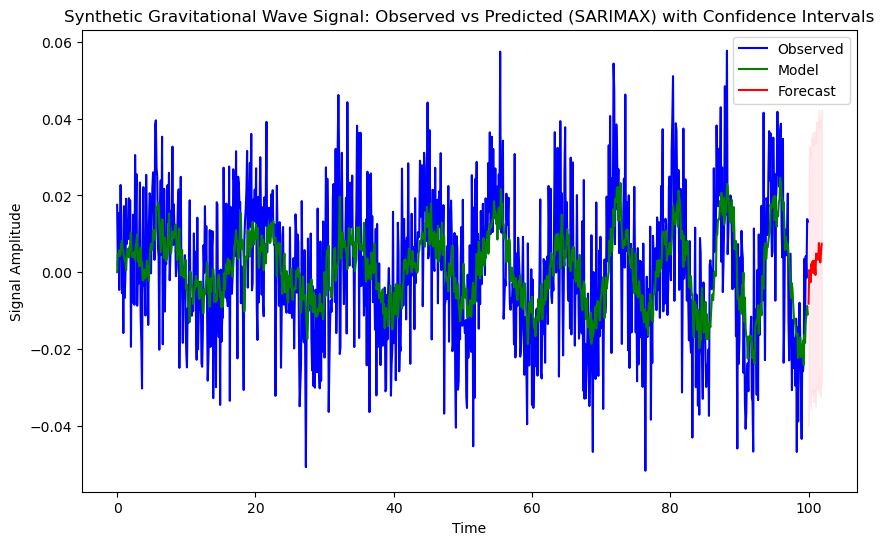

In [10]:
# Exercise 9
# Plot the results, the predicted trend according to the model, and the forecast
plt.figure(figsize=(10, 6))
predictions = results.predict()
# Plot the original data i.e. time (x-axis) vs position
plt.plot(series['Time'].to_numpy(), series['Signal'].to_numpy(), label='Observed', color='blue')
# Plot the time (x-axis) vs predictions 
plt.plot(series['Time'].to_numpy(), predictions.to_numpy(), label='Model', color='green')
# Plot the forecast index (x-axis) vs forecast values
plt.plot(forecast_index, forecast_values.to_numpy(), label='Forecast', color='red')

plt.fill_between(forecast_index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.3)
plt.xlabel('Time')
plt.ylabel('Signal Amplitude')
plt.title('Synthetic Gravitational Wave Signal: Observed vs Predicted (SARIMAX) with Confidence Intervals')
plt.legend()
plt.show()

### Error analysis
Analyse the errors of the predictions

In [11]:
# # Exercise 10
# Compute the:
#   Sum of Squares Total (SST),
#   Summ of Squares Error (SSE),
#   Sum of Squares Regression (SSR),
# and then the coefficient of determination (R²) 
observed = series['Signal']
mean_observed = np.mean(observed)
sst = np.sum((observed - mean_observed) ** 2)
sse = np.sum((observed - predictions) ** 2)
ssr = sst - sse
r2 = 1 - (sse / sst)

# Print the results
print(f'SST: {sst:.2f}')
print(f'SSE: {sse:.2f}')
print(f'SSR: {ssr:.2f}')
print(f'R²: {r2:.2f}')


SST: 0.36
SSE: 0.27
SSR: 0.09
R²: 0.26


In [12]:
# # Exercise 11
# Define the degrees of freedom 
n = len(observed)  # Number of observations
p = len(results.params)  # Number of predictors in SARIMAX

# Calculate MST, MSE, MSR, and F-score
mst = sst / (n - 1)
mse = sse / (n - p - 1)
msr = ssr / p
f_score = msr / mse

# Print the results
print(f'MST: {mst:.2f}')
print(f'MSE: {mse:.2f}')
print(f'MSR: {msr:.2f}')
print(f'F-score: {f_score:.2f}')

MST: 0.00
MSE: 0.00
MSR: 0.01
F-score: 39.00


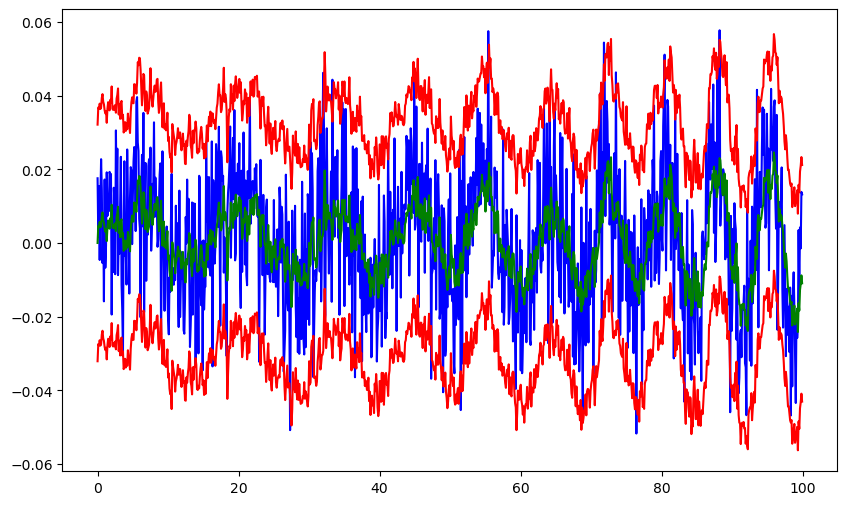

In [13]:
# Exercise 12
# use the mean squared error to assess the precision of the forecast by computing the 95% probability confidence interval 
# plot the original data, the prediction and the lower and upper confidence intervals
from numpy import sqrt
LowerForecast = predictions - 1.96*sqrt(mse)
UpperForecast = predictions + 1.96*sqrt(mse)

plt.figure(figsize=(10, 6))
plt.plot(series['Time'].to_numpy(), series['Signal'].to_numpy(), label='Observed', color='blue')
plt.plot(series['Time'].to_numpy(), predictions.to_numpy(), label='Model', color='green')
plt.plot(series['Time'].to_numpy(), LowerForecast.to_numpy(), label='Model lower bound', color='red')
plt.plot(series['Time'].to_numpy(), UpperForecast.to_numpy(), label='Model upper bound', color='red')
